TODOS:
1. Standartasation of hot encodeds,- I dont think we need it but maybe very at the end we can do it.
2. Generalisation error to linear regression -Done 

### Change the directory to the repository folder in your computer depends on wherever it is.

In [98]:
cd /home/mehmet/Desktop/DTU_Fall_018/Introduction_machine_learning/project2

/home/mehmet/Desktop/DTU_Fall_018/Introduction_machine_learning/project2


In [170]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

# PCA

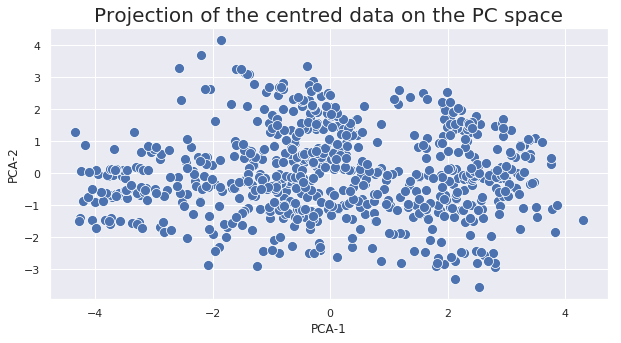

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
df = pd.read_excel('DataSet.xlsx')
df[-5:]

import matplotlib.pyplot as plt
from scipy.linalg import svd
import numpy as np
from datetime import date

X = df.as_matrix(columns=df.columns[df.columns!='Date'])
N = len(df.columns) -1

std = np.std(X, axis=0)
std = np.expand_dims(std,axis=0)

X = X/std
# Subtract mean value from data

Y = X - np.ones((N))*X.mean(axis=0)

# PCA by computing SVD of Y
U,S,V = svd(Y,full_matrices=False)
V = V.T

Z = Y @ V[:,:2]


data = pd.DataFrame({'PCA-1':Z[:,0],'PCA-2':Z[:,1]})  

ax = sns.scatterplot(x="PCA-1", y="PCA-2",
                      s=100, 
                     data=data)
ax.set_title('Projection of the centred data on the PC space', fontsize = 20)
sns.set(rc={'figure.figsize':(1,1)})
ax = ax.get_figure()
ax.savefig('projection_data.png')

In [172]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import pandas as pd
import numpy as np
df = pd.read_excel('DataSet.xlsx')

df = df[(df.temp<=1) & (df.temp>0) & (df.atemp<=1) & (df.atemp>=0) & (df.hum<=1) & (df.hum>=0) & (df.windspeed <=1) ]
orig_y = df['new']
# df['new'] = np.log(((df['new'] - df['new'].mean()) / df['new'].std()).abs()).abs()
# np.log(((df['new'] - df['new'].mean()) / df['new'].std()).abs()).abs().hist()
df.head()
# plt.plot(df['new'])

,ID,Date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,new,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.001389,0.212122,0.590435,0.160296,108,1454,1562
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606


# Linear Model without generalisation

In [173]:
import numpy as np
from sklearn.linear_model import LinearRegression
sub_df = df[[ 'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]
cols = [ 'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for each in cols:
    dummies = pd.get_dummies(sub_df[each], prefix=each)
    sub_df = sub_df.drop(each, axis = 1)
    sub_df = pd.concat([ dummies, sub_df], axis=1)
    
sub_df = pd.concat([ df[['hum']], sub_df], axis=1)
sub_df = pd.concat([ df[['temp']], sub_df], axis=1)
sub_df = pd.concat([ df[['atemp']], sub_df], axis=1)
sub_df = pd.concat([ df[['windspeed']], sub_df], axis=1)


X = sub_df.as_matrix()
y = np.asarray(df['new'])



reg = LinearRegression().fit(X , y)
reg.coef_



array([-2.28784790e+02,  1.65236839e+03,  9.19174911e+01, -7.60546858e+01,
        1.26113871e+16,  1.26113871e+16,  1.26113871e+16,  7.84794347e+14,
       -5.96871172e+15, -9.05173804e+15, -2.29823197e+15, -2.29823197e+15,
       -2.29823197e+15, -2.29823197e+15, -2.29823197e+15, -9.05173804e+15,
        3.43788150e+15, -3.31562457e+15,  5.58684629e+15,  5.58684629e+15,
        5.58684629e+15,  5.58684629e+15,  5.58684629e+15,  5.58684629e+15,
        5.58684629e+15,  5.58684629e+15,  5.58684629e+15,  5.58684629e+15,
        5.58684629e+15,  5.58684629e+15,  3.16775565e+16,  3.16775565e+16,
        3.16775565e+16,  3.16775565e+16])

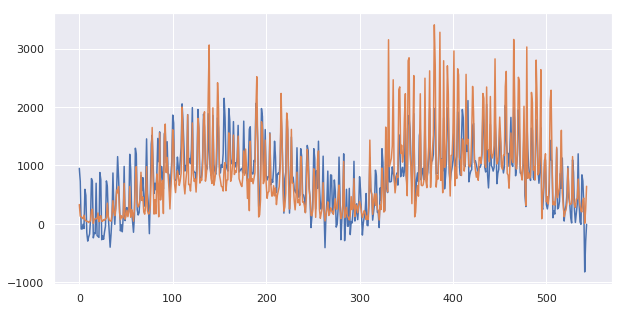

In [174]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
from matplotlib.pyplot import  plot, legend
predicted = plt.plot(range(len(X)), reg.predict(X), label = 'predicted')
original = plt.plot(range(len(X)), y, label = 'original')


plt.savefig('predicted_and_original.png')


# Linear Model with Generalisation

In [175]:
from sklearn import linear_model

def get_ridge_lm(alpha = 0.1):
    reg = linear_model.Ridge (alpha = alpha).fit(X[:200], y[:200])
    return reg



['weekday_5', 'weekday_6', 'holiday_0', 'holiday_1', 'mnth_1', 'mnth_2', 'mnth_3']
[-8.08, 62.92, -19.79, 19.79, -81.95, -58.82, -37.46]


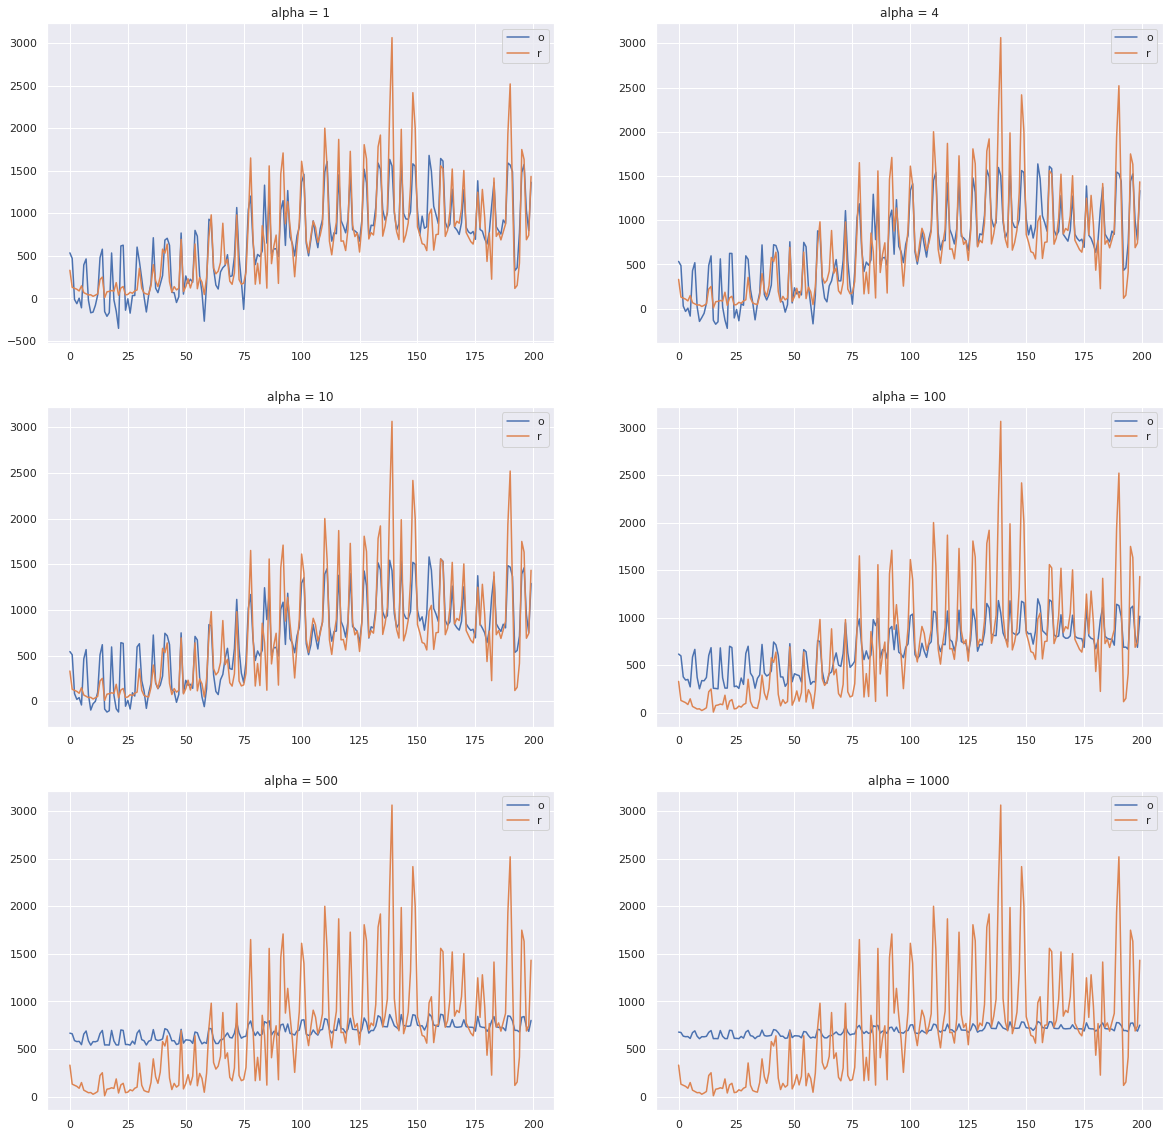

In [194]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]
from matplotlib.pyplot import  plot, legend


alphas = [1, 4, 10, 100, 500, 1000]
for i in range(6):
    plt.subplot(3, 2, i+1)
    predicted = plot(get_ridge_lm(alpha = int(alphas[i])).predict(X[:200]), label = 'predicted')
    legend('predicted')
    original = plot(y[:200], label = 'original')
    legend('original')
    title = 'alpha = ' + str(alphas[i])
    plt.title(title)

plt.savefig('predicted_and_original.png')

attributeNames = [name for name in list(sub_df)]

print(attributeNames[14:21])
print(list(np.around(get_ridge_lm(alpha = 100).coef_[14:21], decimals=2)))




In [106]:
asd cd /home/mehmet/Desktop/DTU_Fall_018/Introduction_machine_learning/02450Toolbox_Python/Tools

SyntaxError: invalid syntax (<ipython-input-106-a63eb34a96bb>, line 1)

In [107]:
pwd

'/home/mehmet/Desktop/DTU_Fall_018/Introduction_machine_learning/project2'

# 2.Forward selection linear regression

['mnth_1', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_10', 'mnth_11', 'season_1', 'season_2', 'season_3', 'season_4']
[-0.031  0.106  0.103  0.072 -0.031 -0.032 -0.04  -0.127  0.367 -0.129
 -0.112]
Cross validation fold 1/10
Features no: 11

['windspeed', 'atemp', 'temp', 'weathersit_3', 'weekday_5', 'mnth_1', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'season_1', 'season_2', 'season_3', 'season_4']
[ 0.004  0.02   0.01  -0.002  0.005 -0.036 -0.038  0.105  0.108  0.066
 -0.039 -0.036 -0.035 -0.039 -0.042 -0.037 -0.119  0.358 -0.127 -0.113]
Cross validation fold 2/10
Features no: 20

['weathersit_1', 'mnth_1', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'season_1', 'season_2', 'season_3', 'season_4']
[-0.014 -0.033  0.108  0.106  0.07  -0.031 -0.039 -0.04  -0.034 -0.124
  0.372 -0.134 -0.115]
Cross validation fold 3/10
Features no: 13

['mnth_1', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 

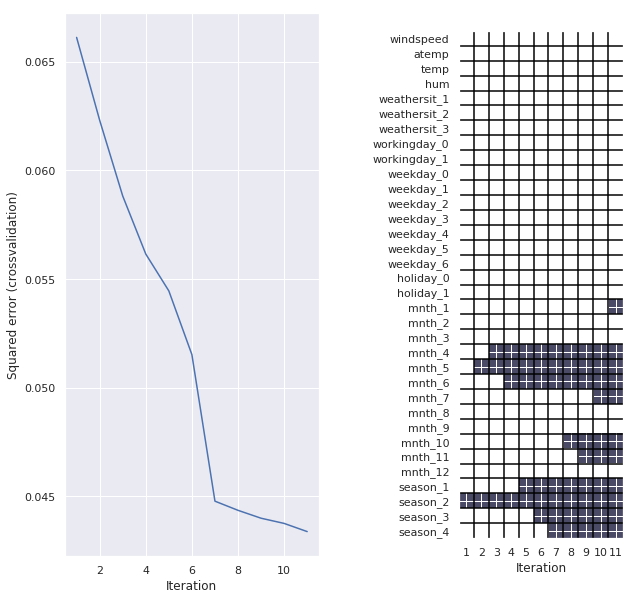

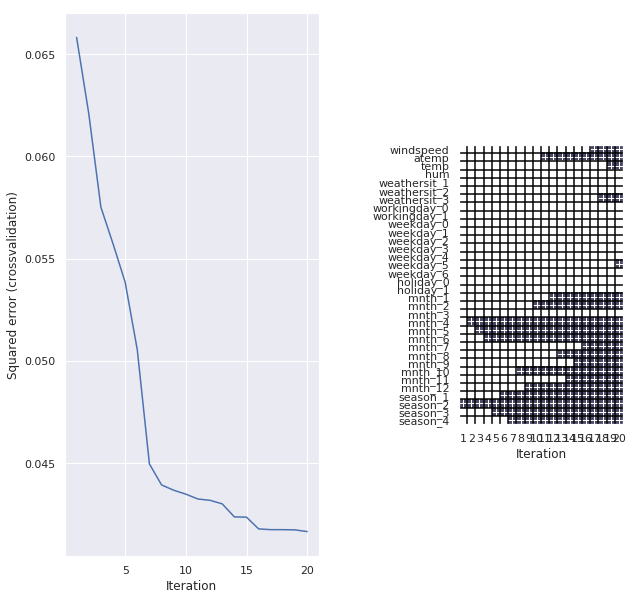

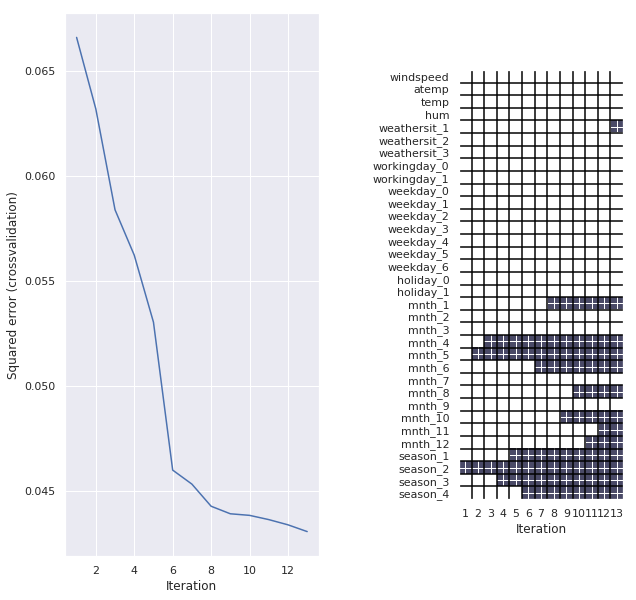

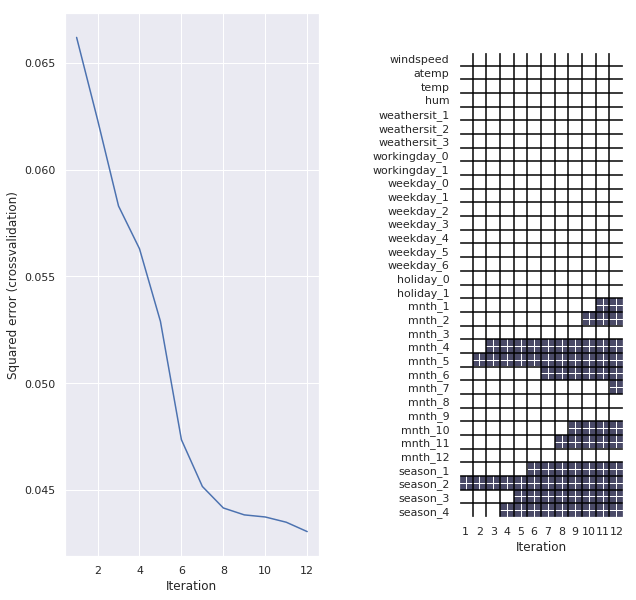

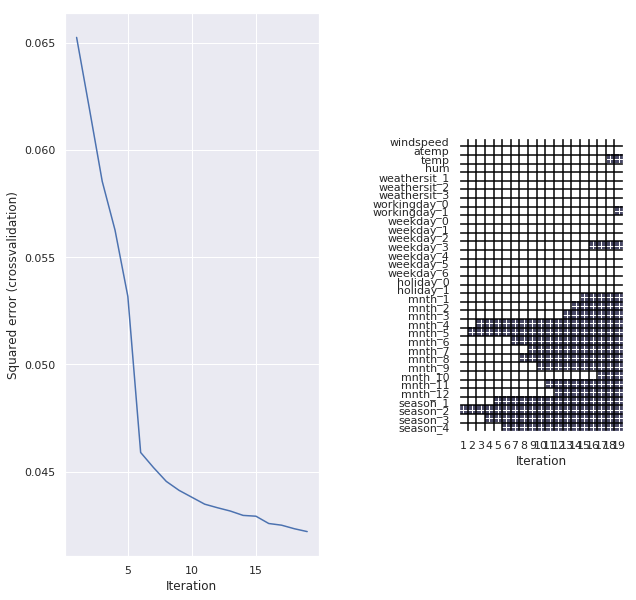

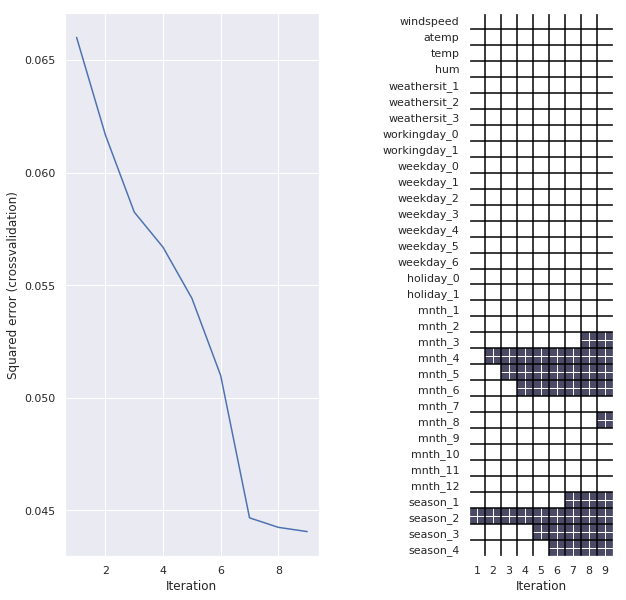

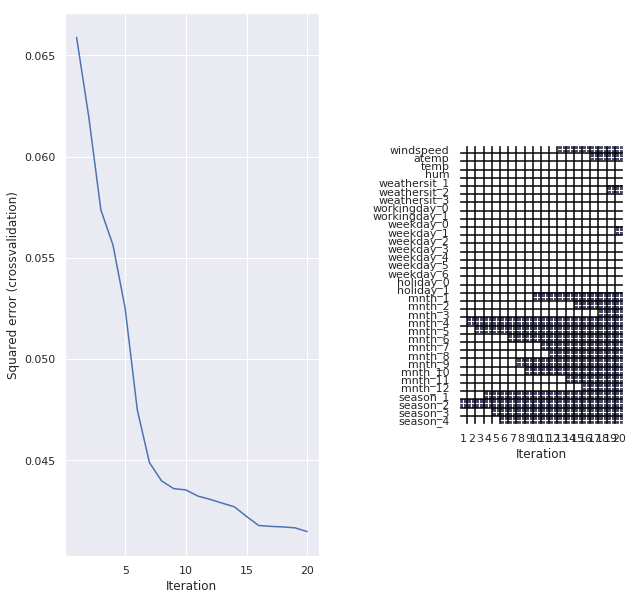

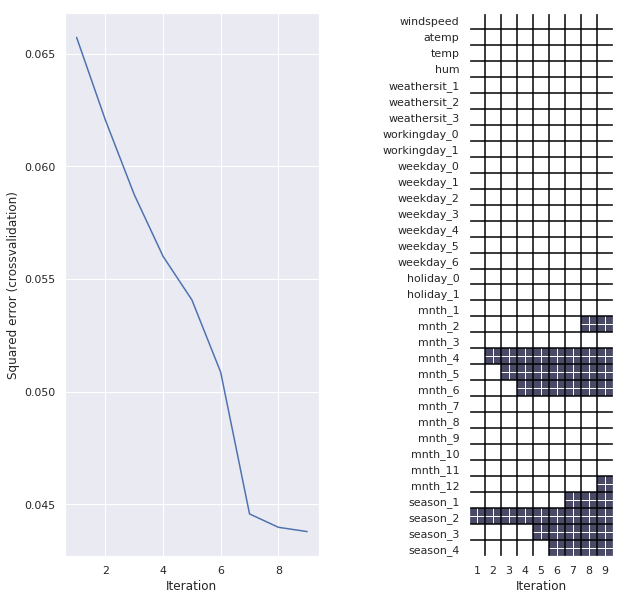

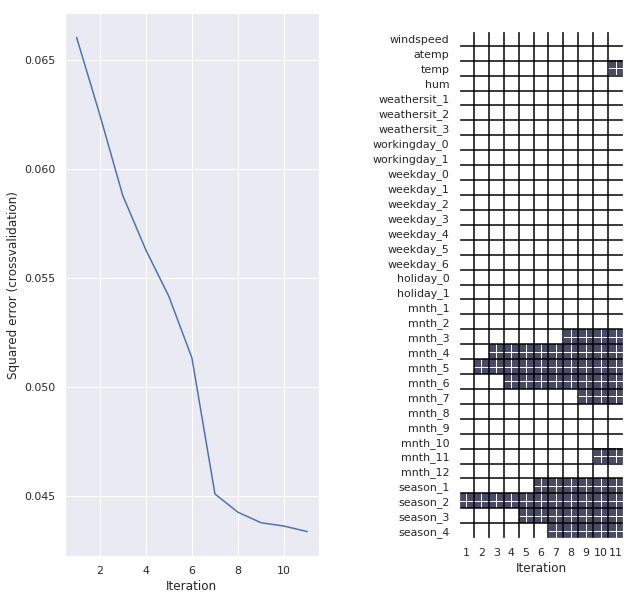

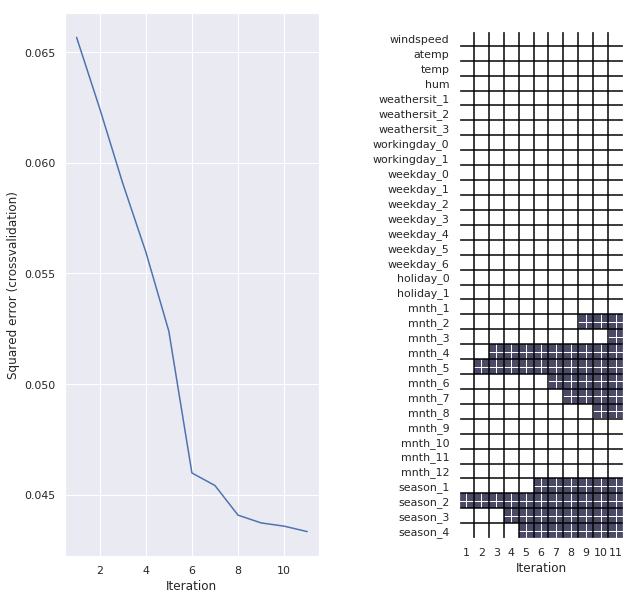

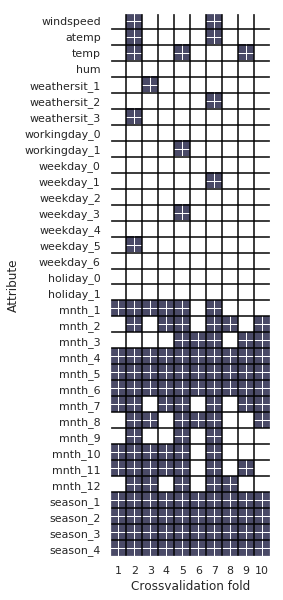

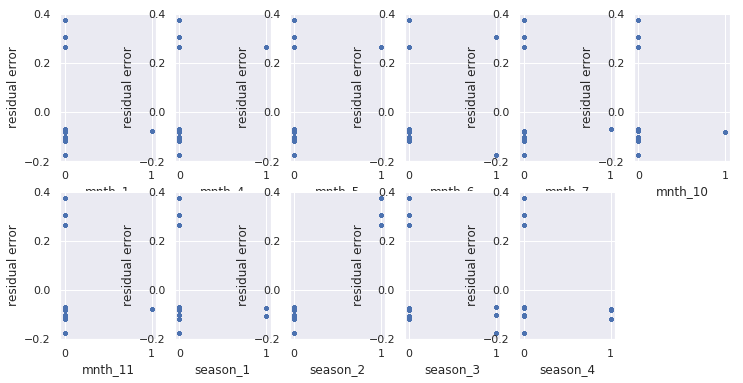

Ran Exercise 6.2.1


In [201]:
# exercise 6.2.1
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
from matplotlib.pyplot import figure, plot, subplot, title, xlabel, ylabel, show, clim, savefig
from scipy.io import loadmat
import sklearn.linear_model as lm
from sklearn import model_selection
from Tools.toolbox_02450 import feature_selector_lr, bmplot
import numpy as np

# Load data from matlab file
mat_data = X

y = X[:,-3].squeeze()
attributeNames = [name for name in list(sub_df)]
N, M = X.shape


## Crossvalidation
# Create crossvalidation partition for evaluation
K = 10
CV = model_selection.KFold(n_splits=K,shuffle=True)

# Initialize variables
Features = np.zeros((M,K))
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_fs = np.empty((K,1))
Error_test_fs = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))

k=0
for train_index, test_index in CV.split(X):
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]
    internal_cross_validation = 4
    
    # Compute squared error without using the input data at all
    Error_train_nofeatures[k] = np.square(y_train-y_train.mean()).sum()/y_train.shape[0]
    Error_test_nofeatures[k] = np.square(y_test-y_test.mean()).sum()/y_test.shape[0]

    # Compute squared error with all features selected (no feature selection)
    m = lm.Ridge (fit_intercept=True, alpha = 100).fit(X_train, y_train)
    
#     m = lm.LinearRegression(fit_intercept=True).fit(X_train, y_train)
    Error_train[k] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
    Error_test[k] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]

    # Compute squared error with feature subset selection
    #textout = 'verbose';
    textout = '';
    selected_features, features_record, loss_record = feature_selector_lr(X_train, y_train, internal_cross_validation, display=textout)
    
    Features[selected_features,k]=1
    # .. alternatively you could use module sklearn.feature_selection
    if len(selected_features) is 0:
        print('No features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
    else:
        m = lm.Ridge (fit_intercept=True, alpha = 100).fit(X_train[:,selected_features], y_train)
        
        some_features = [attributeNames[int(el)] for el in selected_features]
        print(some_features)
        some_coefs = m.coef_
        some_coefs = np.around(some_coefs, decimals=3)
        print(some_coefs)
#         m = lm.LinearRegression(fit_intercept=True).fit(X_train[:,selected_features], y_train)
        Error_train_fs[k] = np.square(y_train-m.predict(X_train[:,selected_features])).sum()/y_train.shape[0]
        Error_test_fs[k] = np.square(y_test-m.predict(X_test[:,selected_features])).sum()/y_test.shape[0]
    
        figure(k)
        subplot(1,2,1)
        plot(range(1,len(loss_record)), loss_record[1:])
        xlabel('Iteration')
        ylabel('Squared error (crossvalidation)')    
        plt.savefig('MSE_cross_validation.png')
        
        subplot(1,3,3)
        bmplot(attributeNames, range(1,features_record.shape[1]), -features_record[:,1:])
        clim(-1.5,0)
        xlabel('Iteration')

    print('Cross validation fold {0}/{1}'.format(k+1,K))
#     print('Train indices: {0}'.format(train_index))
#     print('Test indices: {0}'.format(test_index))
    print('Features no: {0}\n'.format(selected_features.size))

    k+=1


# Display results
print('\n')
print('Linear regression without feature selection:\n')
print('- Training error: {0}'.format(Error_train.mean()))
print('- Test error:     {0}'.format(Error_test.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test.sum())/Error_test_nofeatures.sum()))
print('Linear regression with feature selection:\n')
print('- Training error: {0}'.format(Error_train_fs.mean()))
print('- Test error:     {0}'.format(Error_test_fs.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train_fs.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test_fs.sum())/Error_test_nofeatures.sum()))

figure(k)
subplot(1,3,2)
bmplot(attributeNames, range(1,Features.shape[1]+1), -Features)
clim(-1.5,0)
xlabel('Crossvalidation fold')
ylabel('Attribute')
plt.savefig('forward_selection2.png')

# Inspect selected feature coefficients effect on the entire dataset and
# plot the fitted model residual error as function of each attribute to
# inspect for systematic structure in the residual

f=1 # cross-validation fold to inspect
ff=Features[:,f-1].nonzero()[0]
if len(ff) is 0:
    print('\nNo features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
else:
    m = lm.Ridge (fit_intercept=True, alpha = 100).fit(X[:,ff], y)
#     m = lm.LinearRegression(fit_intercept=True).fit(X[:,ff], y)
    
    y_est= m.predict(X[:,ff])
    residual=y-y_est
    
    figure(k+1, figsize=(12,6))
    title('Residual error vs. Attributes for features selected in cross-validation fold {0}'.format(f))
    for i in range(0,len(ff)):
       subplot(2,np.ceil(len(ff)/2.0),i+1)
       plot(X[:,ff[i]],residual,'.')
       xlabel(attributeNames[ff[i]])
       ylabel('residual error')
    
savefig('Forward_selection.png')
show()

print('Ran Exercise 6.2.1')


Crossvalidation fold: 1/10
Training network 1/4...
Epoch: 5; Error: 5.288167032517526;
The goal of learning is reached
Training network 2/4...
Epoch: 5; Error: 11.435978101526302;
Epoch: 10; Error: 1.2253396938026941;
The goal of learning is reached
Training network 3/4...
Epoch: 5; Error: 12.675037654986642;
Epoch: 10; Error: 2.7931873803466942;
The goal of learning is reached
Training network 4/4...
Epoch: 5; Error: 18.84912643647948;
Epoch: 10; Error: 3.3569990295169703;
Epoch: 15; Error: 0.9831988413171955;
The goal of learning is reached
BEST HIDDEN UNIT AMOUNT: 8...
Best train error: 0.7505814417419429...

Crossvalidation fold: 2/10
Training network 1/4...
Epoch: 5; Error: 15.526422522319885;
Epoch: 10; Error: 1.1089208578337344;
The goal of learning is reached
Training network 2/4...
Epoch: 5; Error: 10.841532605335093;
The goal of learning is reached
Training network 3/4...
Epoch: 5; Error: 8.272158776555507;
Epoch: 10; Error: 0.7217025681773135;
The goal of learning is reache

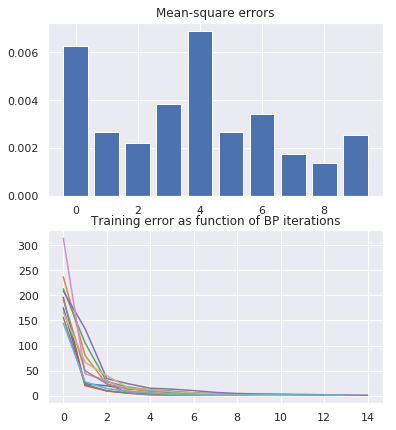

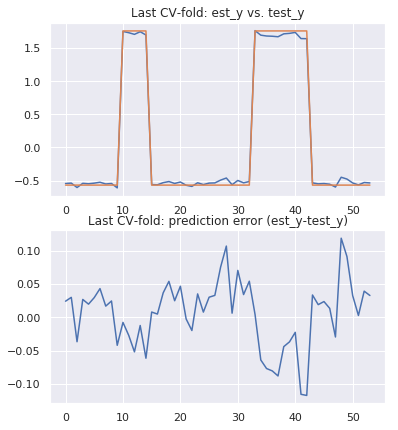

Ran Exercise 8.2.6


In [165]:
# exercise 8.2.6

from matplotlib.pyplot import figure, plot, subplot, title, show, bar
import numpy as np
from scipy.io import loadmat
import neurolab as nl
from sklearn import model_selection
from scipy import stats

# Load data from matlab file
mat_data = X

y = X[:,-3].squeeze()
attributeNames = [name for name in list(sub_df)]
N, M = X.shape
C = 2

# Normalize data
X = stats.zscore(X);
                
## Normalize and compute PCA (UNCOMMENT to experiment with PCA preprocessing)
#Y = stats.zscore(X,0);
#U,S,V = np.linalg.svd(Y,full_matrices=False)
#V = V.T
##Components to be included as features
#k_pca = 3
#X = X @ V[:,0:k_pca]
#N, M = X.shape


# Parameters for neural network classifier
n_hidden_units = [ 4, 8, 16, 32]     # number of hidden units
n_train = len(n_hidden_units)             # number of networks trained in each k-fold
learning_goal = 1     # stop criterion 1 (train mse to be reached)
max_epochs = 64         # stop criterion 2 (max epochs in training)
show_error_freq = 5     # frequency of training status updates

# K-fold crossvalidation
K = 10                   # only three folds to speed up this example
CV = model_selection.KFold(K,shuffle=True)

# Variable for classification error
errors = np.zeros(K)*np.nan
error_hist = np.zeros((max_epochs,K))*np.nan
bestnet = list()
best_errors = list()
best_hidden_n_list = list()
k=0


def glm_validate(X,y,cvf=10):
    ''' Validate linear regression model using 'cvf'-fold cross validation.
        The loss function computed as mean squared error on validation set (MSE).
        Function returns MSE averaged over 'cvf' folds.

        Parameters:
        X       training data set
        y       vector of values
        cvf     number of crossvalidation folds        
    '''
    y = y.squeeze()
    CV = model_selection.KFold(n_splits=cvf, shuffle=True)
    validation_error=np.empty(cvf)
    f=0
    for train_index, test_index in CV.split(X):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        m = linear_model.Ridge(fit_intercept=True, alpha = 100).fit(X_train, y_train)
        validation_error[f] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]
        f=f+1
    return validation_error.mean()
    

for train_index, test_index in CV.split(X,y):
    print('\nCrossvalidation fold: {0}/{1}'.format(k+1,K))    
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]
    
    best_train_error = np.inf
    best_hidden_n = None
    for i in range(n_train):
        print('Training network {0}/{1}...'.format(i+1,n_train))
        # Create randomly initialized network with 2 layers
        ann = nl.net.newff([[-3, 3]]*M, [n_hidden_units[i], 1], [nl.trans.TanSig(),nl.trans.PureLin()])
        if i==0:
            bestnet.append(ann)
        # train network
        train_error = ann.train(X_train, y_train.reshape(-1,1), goal=learning_goal, epochs=max_epochs, show=show_error_freq)
        if train_error[-1]<best_train_error:
            bestnet[k]=ann
            best_train_error = train_error[-1]
            best_hidden_n = n_hidden_units[i]
            error_hist[range(len(train_error)),k] = train_error
    print('BEST HIDDEN UNIT AMOUNT: {0}...'.format(best_hidden_n))
    best_hidden_n_list.append(best_hidden_n)
    best_errors.append(best_train_error)
    print('Best train error: {0}...'.format(best_train_error))
    y_est = bestnet[k].sim(X_test).squeeze()
    errors[k] = np.power(y_est-y_test,2).sum().astype(float)/y_test.shape[0]
    k+=1
    #break

# Print the average least squares error
print('Mean-square error: {0}'.format(np.mean(errors)))

figure(figsize=(6,7));
subplot(2,1,1); bar(range(0,K),errors); title('Mean-square errors');
subplot(2,1,2); plot(error_hist); title('Training error as function of BP iterations');
figure(figsize=(6,7));
subplot(2,1,1); plot(y_est); plot(y_test); title('Last CV-fold: est_y vs. test_y'); 
subplot(2,1,2); plot((y_est-y_test)); title('Last CV-fold: prediction error (est_y-test_y)'); 
savefig('ann_regression.png')
show()

print('Ran Exercise 8.2.6')

#% The weights if the network can be extracted via
#bestnet[0].layers[0].np['w'] # Get the weights of the first layer
#bestnet[0].layers[0].np['b'] # Get the bias of the first layer
